# Individual Task - Knowledge Representation and Reasoning
---


## Fuzzy Control System: Covid-19 Diagnosis

The COVID-19 disease had an outbreak that seriously affected the whole world, occurred in December 2019, and thus was a global pandemic was declared by the World Health Organization (WHO). To reduce the impact of the epidemic on humans, it is important to detect the symptoms of the disease in a timely and accurate manner. Several new variants of COVID-19 were identified in the United Kingdom (UK), South Africa, Brazil and India, and preliminary findings suggested that these mutations increase the transmissibility of the virus.

Therefore, the aim of this project, in the style of a Google Colab file, is to construct a support system based on fuzzy logic for experts to help detect of COVID-19 infection risk (low, medium, high, very high) in a timely and accurate manner and to get a numerical output on symptoms of the virus from every person. This project was heavily inspired by other health experts and existing Fuzzy Logic Systems[1].

The decision support system consists of one main Mamdani type (several inputs -> several outputs) fuzzy inference systems (FIS). The symptoms identified can be classified in three groups. Common and Serious (Category 1), Rare Symptoms (Category 2) and Personal Information (Category 3). The first category has three inputs, Fever, Cough and Fatigue; the second has seven inputs, Sore Throat, Shortness of Breath, Chest Pain of Dysfunction, Loss of Taste/Smell, Body Aches, Conjuctivitis, and Diarrhea; and the third has three inputs, Age, Smoking or Alcohol, and Contact with Infected Person.

Thanks to the definition of these 13 symptoms we have established according to criteria we have researched, we can evaluate the risk a person will have of being infected with Covid-19.

## What is Fuzzy Logic?
Fuzzy Logic provides artificial intelligence methods that resemble human reasoning for handling the various type uncertainties. Fuzzy Inference Systems produce an output by processing incomplete, ambiguous fuzzy inputs of a problem that can be defined by linguistic parameters. Fuzzy inference system consists of a fuzzification interface which transforms the crisp inputs into degrees of match with linguistic values; a rule base containing a number of fuzzy IF–THEN rules; a database defining the membership functions of the fuzzy sets used in the fuzzy rules; a decision-making unit performing the inference operations on the rules; and finally a defuzzification interface which transforms the fuzzy results of the inference into a crisp output. A graphical example of a Fuzzy Inference system is shown below.
![FuzzyInferenceSystem](https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs12553-021-00624-9/MediaObjects/12553_2021_624_Fig1_HTML.png)

## Python Libraries
The first step of this Google Colab is to import the necessary Python libraries to make the fuzzy control system functional.

In [1]:
!pip install -U scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib

## Symptoms

We need to create a fuzzy system which generates a defuzzyfied output of mild, moderate or high risk of being infected with Covid-19. To do so, after doing the necessary medical research, we have considered 12 symptoms as the necessary to evaluate the state of the patient.

The problem is formulated like this:
- Antecendents (Inputs)

  **Serious & Common Symptoms**
  - Fever
    - Universe (i.e., crisp value range): (The temperature is determined by a medical thermometer, 35 to 42)
    - Fuzzy (i.e., fuzzy value range): mild, moderate, high
  - Cough
    - Universe: Can you determine the cough severity with a decimal number between 0-10?
    - Fuzzy: mild, moderate, high
  - Fatigue
    - Universe: Can you determine the fatigue severity with a decimal number between 0-10?
    - Fuzzy: mild, moderate, high

  **Rare Symptoms**
  - Sore Throat
    - Universe: Can you determine the soreness of your throat with a decimal number between 0-10?
    - Fuzzy: mild, moderate, high
  - Shortness of Breath
    - Universe: Can you determine the severity of shortness of breath with a decimal number between 0-10?
    - Fuzzy: mild, moderate, high
  - Chest Pain/Dysfunction
    - Universe: Do you have a chest pain or dysfunction? If you have, can you determine the severity of chest pain or dysfunction with a decimal number between 0-10?
    - Fuzzy: mild, moderate, high
  - Loss of Taste/Smell
    - Universe: Do you have a loss of Taste/Smell? If you have, can you determine the severity of loss of taste/smell with a decimal number between 0-10?
    - Fuzzy: mild, moderate, high
  - Body-aches
    - Universe: Do you have Body-aches? If you have, can you determine the body ache severity with a number between 1-10?
    - Fuzzy: mild, moderate, high
  - Conjunctivitis
    - Universe: Do you have a Conjuctivitis? If you have, can you determine the conjunctivitis severity with a number between 1-10?
    - Fuzzy: mild, moderate, high
  - Diarrhea
    - Universe: Do you diarrhea? If you have, can you determine the diarrhea severity with a number between 1-10?
    - Fuzzy: none, nausea, vomiting, diarrhea

  **Personal Information**
  - Age
    - Universe: How old are you?
    - Fuzzy: young, middle-age, old [4]
  - Smoking/Alcohol
    - Universe: Do you use cigarettes or alcohol? If you do, can you determine the frequency and amount with a number between 0-10?
    - Fuzzy: mild, moderate, high
  - Contact with Infected Person
    - Universe: Have been in contact with someone infected by Covid-19? If you have, how many days have passed since you last were in contact with them?
    - Fuzzy: last three days, last two weeks, more than two weeks

All decisions related to the fuzziness range of any symptom have been done according to the Covid-19 literature researched[1][5][7]. For example, we have not considered the gender of the patients because the cases related to gender were approximate to 50% each. The same reasoning was applied to other symptoms like comorbities (chronic diseases), nausea or vomiting were their link to Covid-19 cases was very low (<1%).  

In [2]:
# Antecedent Objects [2]
fever = ctrl.Antecedent(np.arange(35, 43, 1), 'fever')
cough = ctrl.Antecedent(np.arange(0, 11, 1), 'cough')
fatigue = ctrl.Antecedent(np.arange(0, 11, 1), 'fatigue')
sore_throat = ctrl.Antecedent(np.arange(0,11, 1), 'sore_throat')
shortness_of_breath = ctrl.Antecedent(np.arange(0, 11, 1),
                                      'shortness_of_breath')
chestpain_or_dysfunction = ctrl.Antecedent(np.arange(0, 11, 1),
                                           'chestpain_or_dysfunction')
loss_of_taste_or_smell = ctrl.Antecedent(np.arange(0, 11, 1),
                                         'loss_of_taste_or_smell')
body_aches = ctrl.Antecedent(np.arange(0, 11, 1), 'body_aches')
conjunctivitis = ctrl.Antecedent(np.arange(0, 11, 1), 'conjunctivitis')
diarrhea = ctrl.Antecedent(np.arange(0, 11, 1),
                                           'diarrhea')
age = ctrl.Antecedent(np.arange(0, 100, 1), 'age')
smoking_or_alcohol = ctrl.Antecedent(np.arange(0, 11, 1), 'smoking_or_alcohol')
contact_with_infected = ctrl.Antecedent(np.arange(0, 31, 1),
                                        'contact_with_infected')

# Consequen Object
isCovid = ctrl.Consequent(np.arange(0, 101, 1), 'isCovid')

### Category-1 Membership Function Choice Explanation [3]


Using different types of membership functions, such as Gaussian for the first two values and a trapezoidal one for the last, in a fuzzy logic system can be attributed to the specific characteristics of the data or the behavior you are trying to model. Here are some reasons for choosing this combination:

### Gaussian Membership Function (for the first two values)

1. **Smoothness and Symmetry**: Gaussian functions are smooth and symmetric, making them suitable for representing natural, gradual changes. They are often used to model phenomena where a gradual increase to a peak and then a gradual decrease is observed.

2. **Natural Phenomena Representation**: Many real-world phenomena, like temperatures or biological measurements, follow a distribution that resembles a Gaussian curve, making it a natural choice for these variables.

3. **Overlapping**: Gaussian functions allow for a smooth transition between different linguistic values (like low, medium, high). This can be useful when there is no clear boundary between these categories in real-world scenarios.

### Trapezoidal Membership Function (for the last value)

1. **Range Representation**: Trapezoidal functions are useful for representing a range where two extremes are more or less fixed, but there is uncertainty in the middle. This is particularly useful for extreme values or edge cases.

2. **Inclusive Edges**: If the last value represents an extreme or a broad category (like 'very high' or 'severe'), a trapezoidal function is useful as it includes a wider range of values at the top level. This is suitable for cases where everything beyond a certain point is equally considered as 'high' or 'severe'.

3. **Sharp Boundaries**: Unlike Gaussian functions, trapezoidal functions can represent scenarios with sharper boundaries or where a more distinct categorization is needed, especially at the extremes.

### Contextual Application

In the context of your project, perhaps the first two antecedents (represented by Gaussian functions) are symptoms or conditions that change gradually and are not easily categorized into discrete states. The last antecedent (represented by a trapezoidal function) might be a symptom or a condition that has a more defined and extended severe state.

For example, consider symptoms like fever and cough (first two antecedents) and a condition like age or exposure level (last antecedent). Fever and cough might have a natural, gradational intensity, well-represented by Gaussian curves. In contrast, age or exposure level might have more defined categories, especially at higher ranges, making a trapezoidal function more appropriate.

This combination of Gaussian and trapezoidal membership functions allows for a more nuanced and accurate representation of real-world data, enhancing the capability and reliability of the fuzzy logic system.

In [ ]:
fever['mild'] = fuzz.gaussmf(fever.universe, 35, 0.7)
fever['moderate'] = fuzz.gaussmf(fever.universe, 37, 0.5)
fever['severe'] = fuzz.trapmf(fever.universe, [38, 39, 42, 42])

cough['mild'] = fuzz.gaussmf(cough.universe, 0, 0.8)
cough['moderate'] = fuzz.gaussmf(cough.universe, 5, 1.5)
cough['severe'] = fuzz.trapmf(cough.universe, [6, 8, 10, 10])

fatigue['mild'] = fuzz.gaussmf(fatigue.universe, 0, 0.8)
fatigue['moderate'] = fuzz.gaussmf(fatigue.universe, 5, 1.5)
fatigue['severe'] = fuzz.trapmf(fatigue.universe, [6, 8, 10, 10])

### Category-2 Membership Function Choice Explanation [3]



Using a trapezoidal membership function for the first and last values and a Gaussian function for the second value in a three-tier fuzzy antecedent setup can be based on specific characteristics of the data or phenomena you're modeling. This arrangement suggests a particular approach to categorizing the levels of the antecedent. Here's a detailed explanation:

### Trapezoidal Membership Function (for the first and last values)

1. **Capturing Extremes or Broad Categories**: The trapezoidal function is effective for representing the extremes or broad categories of a variable. For the first value, this might be a 'very low' or 'minimal' category; for the last value, a 'very high' or 'maximum' category. These categories often encompass a wide range of values without a sharp peak, making the trapezoidal shape suitable.

2. **Handling Ambiguous Boundaries**: Trapezoidal functions are beneficial when the boundaries of a category are not sharply defined. For the lowest and highest categories, there are often scenarios where a gradual transition to and from these states is more realistic than a sharp cutoff, which a trapezoidal function can effectively represent.

### Gaussian Membership Function (for the second value)

1. **Modeling a Natural, Gradual Change**: The Gaussian function's smooth and symmetric nature is ideal for representing a state that changes gradually. This is typical for a 'moderate' or 'average' category, where there's a natural progression to a peak and then a decline.

2. **Overlap and Transition**: The Gaussian shape allows for smooth transitions and overlaps with other states, which is particularly important for the middle category in a three-tier system. It indicates a scenario where moving into and out of this state is a gradual process.

### Application in Context

An example of this setup could be in measuring something like risk or severity, where:

- The first value ('low' risk or severity) captures a broad range of minimal states without a distinct boundary between 'no risk' and 'low risk.'
- The second value ('moderate' risk or severity) represents a typical or average state where there's a clear peak in likelihood or occurrence.
- The last value ('high' risk or severity) encompasses a wide range of severe states, again without a distinct boundary at the extreme end.

This configuration allows for nuanced and contextually appropriate modeling of variables, particularly useful in systems where the extreme categories need to encompass a broader range of values, and the middle category represents a more defined, typical state. This approach enhances the fuzzy logic system's ability to handle real-world ambiguity and gradual transitions between states.

In [ ]:
sore_throat['mild'] = fuzz.trapmf(sore_throat.universe, [0, 0, 2, 4])
sore_throat['moderate'] = fuzz.gaussmf(sore_throat.universe, 5, 1.5)
sore_throat['severe'] = fuzz.trapmf(sore_throat.universe, [6, 8, 10, 10])

shortness_of_breath['mild'] = fuzz.trapmf(shortness_of_breath.universe, [0, 0, 2, 4])
shortness_of_breath['moderate'] = fuzz.gaussmf(shortness_of_breath.universe, 5, 1.5)
shortness_of_breath['severe'] = fuzz.trapmf(shortness_of_breath.universe, [6, 8, 10, 10])

chestpain_or_dysfunction['mild'] = fuzz.trapmf(chestpain_or_dysfunction.universe, [0, 0, 2, 4])
chestpain_or_dysfunction['moderate'] = fuzz.gaussmf(chestpain_or_dysfunction.universe, 5, 1.5)
chestpain_or_dysfunction['severe'] = fuzz.trapmf(chestpain_or_dysfunction.universe, [6, 8, 10, 10])

loss_of_taste_or_smell['mild'] = fuzz.trapmf(loss_of_taste_or_smell.universe, [0, 0, 2, 4])
loss_of_taste_or_smell['moderate'] = fuzz.gaussmf(loss_of_taste_or_smell.universe, 5, 1.5)
loss_of_taste_or_smell['severe'] = fuzz.trapmf(loss_of_taste_or_smell.universe, [7, 8, 10, 10])

body_aches['mild'] = fuzz.trapmf(body_aches.universe, [0, 0, 2, 4])
body_aches['moderate'] = fuzz.gaussmf(body_aches.universe, 5, 1.5)
body_aches['severe'] = fuzz.trapmf(body_aches.universe, [7, 8, 10, 10])

conjunctivitis['mild'] = fuzz.trapmf(conjunctivitis.universe, [0, 0, 2, 4])
conjunctivitis['moderate'] = fuzz.gaussmf(conjunctivitis.universe, 5, 1.5)
conjunctivitis['severe'] = fuzz.trapmf(conjunctivitis.universe, [7, 8, 10, 10])

diarrhea['mild'] = fuzz.trapmf(diarrhea.universe, [0, 0, 2, 4])
diarrhea['moderate'] = fuzz.gaussmf(diarrhea.universe, 5, 1.5)
diarrhea['severe'] = fuzz.trapmf(diarrhea.universe, [7, 8, 10, 10])

### Category-3 Membership Function Choice Explanation [3]

Using triangular membership functions for the first two values and a trapezoidal membership function for the last value in a fuzzy logic system is a strategic choice that reflects specific characteristics of the data or phenomena you are modeling. This setup can be particularly effective under certain conditions:

### Triangular Membership Function (for the first two values)

1. **Clear and Distinct Categories**: The triangular function is excellent for representing clear and distinct categories where there is a precise peak or most representative value. This is ideal for situations where a variable can be distinctly categorized, and each category has a well-defined central point.

2. **Sharp Boundaries**: Triangular functions provide sharper transitions between categories compared to Gaussian functions. This can be beneficial when the variable exhibits less overlap between categories and more distinct transitions.

3. **Simplicity and Computational Efficiency**: Triangular functions are simple and computationally efficient to handle. They are often used in scenarios where the complexity of Gaussian functions is not needed or desired.

### Trapezoidal Membership Function (for the last value)

1. **Handling Extremes or Broad Categories**: The trapezoidal function is suitable for representing a range that has more ambiguity or a broader spectrum, especially at the high end. This is often used for 'high' or 'maximum' categories where the upper limit is not sharply defined.

2. **Inclusive Upper Range**: A trapezoidal function can effectively capture scenarios where all values beyond a certain point are equally considered part of the highest category. This is particularly useful for variables where the extreme category encompasses a wide range of values.

### Conclusion

This combination of triangular for the first two values and trapezoidal for the last value in a fuzzy system allows for precise modeling of scenarios where the initial categories are distinct and sharply defined, while the final category is broader and more encompassing. It is a practical approach that aligns with the real-world distribution of many variables, especially in scenarios like medical symptom assessment, risk evaluation, or quality grading.

In [ ]:
age['young'] = fuzz.trimf(age.universe, [0, 0, 30])
age['middle_age'] = fuzz.trimf(age.universe, [28, 44, 60])
age['old'] = fuzz.trapmf(age.universe, [56, 80, 100, 100])

smoking_or_alcohol['mild'] = fuzz.trapmf(diarrhea.universe, [0, 0, 1, 3])
smoking_or_alcohol['moderate'] = fuzz.gaussmf(diarrhea.universe, 6, 1.5)
smoking_or_alcohol['severe'] = fuzz.trapmf(diarrhea.universe, [8, 9, 10, 10])

contact_with_infected['less_three_days'] = fuzz.trimf(contact_with_infected.universe, [0, 0, 3])
contact_with_infected['last_two_weeks'] = fuzz.trimf(contact_with_infected.universe, [3, 8.5, 14])
contact_with_infected['more_than_two_weeks'] = fuzz.trimf(contact_with_infected.universe, [14, 22, 30])

### Covid-19 Membership Function Choice Explanation [3]

Using four Gaussian membership functions to represent different levels of COVID-19 diagnosis risk (low, medium, high, very high) can be a strategic choice in a fuzzy logic system, particularly for the following reasons:

### 1. Gradual Transition Between States

- **Smooth and Natural Overlap**: Gaussian functions provide a smooth and gradual transition between different states. This is crucial in medical diagnosis where the transition from one risk level to another (e.g., from low to medium risk) isn't abrupt but rather gradual.
- **Handling Uncertainty**: Health conditions often don't switch sharply from one category to another. Gaussian curves, with their smooth bell-shaped curve, naturally model the uncertainty and gradations present in symptom severity and disease progression.

### 2. Representing Symptom Variability

- **Symptom Intensity and Spread**: Different individuals experience and report symptoms with varying intensities. Gaussian functions, with their standard deviation, can effectively capture the variability and distribution of symptom severities among different patients.
- **Flexibility in Severity Representation**: The flexibility of Gaussian functions to adjust their mean and standard deviation allows for fine-tuning the system to accurately represent different levels of COVID-19 risk based on evolving medical data and research.

### 3. Modeling Real-World Medical Data

- **Alignment with Statistical Data**: Many biological and medical phenomena follow a normal distribution (which the Gaussian function represents), making it a natural fit for modeling such data.
- **Data-Driven Approach**: Gaussian functions can be aligned with statistical data on COVID-19 symptoms and outcomes, allowing the system to mirror real-world scenarios more accurately.

### 4. Enhanced Sensitivity to Symptom Changes

- **Responsive to Small Changes**: Gaussian functions can be sensitive to small changes in input variables, which is critical in a medical diagnosis context where minor variations in symptoms can lead to different risk assessments.
- **Balanced Risk Assessment**: By using Gaussian curves for each risk level, the system can more accurately balance the risk assessment, ensuring that the output (risk level) is proportional to the input (symptom severity).

### Conclusion

In the context of COVID-19 diagnosis, where symptom severity and patient condition can vary widely and change gradually, Gaussian membership functions offer a nuanced and realistic way to model the risk levels. They provide a balanced, sensitive, and statistically aligned approach to categorizing risk, which is essential for accurate and reliable medical decision support systems.

In [ ]:
isCovid['low'] = fuzz.gaussmf(isCovid.universe, 0, 6)
isCovid['medium'] = fuzz.gaussmf(isCovid.universe, 33, 6)
isCovid['high'] = fuzz.gaussmf(isCovid.universe, 66, 6)
isCovid['very_high'] =  fuzz.gaussmf(isCovid.universe, 100, 6)

To check if the antecedents and consequents were well-defined we recurred to the help of ChatGPT to offer an analysis on our code. This is the output we have received and will take into consideration if any changes are made.[3]
Your code for setting up the antecedents (input variables), consequent (output variable), and their corresponding membership functions looks well-structured and thought out. It appears you have carefully considered the various symptoms and personal factors that could contribute to a COVID-19 diagnosis, and have chosen appropriate fuzzy membership functions to represent them.

Here are a few observations and suggestions to consider:

1. **Range and Granularity of Input Variables**:
   - Ensure that the range for each variable is appropriate. For instance, fever typically ranges from normal body temperature (around 36.5°C to 37.5°C) to higher temperatures indicative of a fever. Adjust the range if necessary to reflect realistic clinical measurements.

2. **Membership Functions**:
   - Your choice of Gaussian and trapezoidal membership functions is appropriate for representing the gradual increase and decrease in symptom severity.
   - Be mindful of the parameters you set for these functions (like the mean and standard deviation for Gaussian functions) as they directly impact how the system interprets the input.

3. **Overlapping Membership Functions**:
   - Ensure that there's an adequate overlap between membership functions. This overlap is crucial in fuzzy logic for handling ambiguity and partial truth values.

4. **Output Variable `isCovid`**:
   - The membership functions for the output variable 'isCovid' are well-defined. The categorization into 'low', 'medium', 'high', and 'very high' is clear and should provide a nuanced output.
   - Consider if a Gaussian membership function for 'very high' with a standard deviation of 10 might be too broad, potentially causing overlap with lower categories. Adjust if necessary.

5. **Accuracy and Validation**:
   - After setting up the system, it's important to validate its accuracy with real-world data, if available. Compare the system's output with actual diagnostic results to ensure its reliability.

6. **Additional Considerations**:
   - Remember to include a defuzzification step to convert the fuzzy output into a crisp, actionable value.
   - Consider the ethical implications and the necessity for expert validation, especially given the health-related context of this system.

7. **Visualization**:
   - Visualizing the membership functions for both input and output variables can be very helpful. It allows you to see how the inputs are being interpreted and can aid in fine-tuning.

8. **Next Steps**:
   - The next step would be to define the fuzzy rules that connect these inputs to the output. These rules are crucial as they will determine how the system interprets the combinations of different symptoms and risk factors.

Overall, you're on the right track. Keep in mind the importance of testing and validation in the development of a medical diagnostic tool. If you need further assistance in any specific area, such as rule creation or system testing, feel free to ask!

## View Symptoms & Consequent Covid-19

We will view the symptoms three membership functions respectively in order of relevance to the diagnosis of Covid-19.

### Category 1

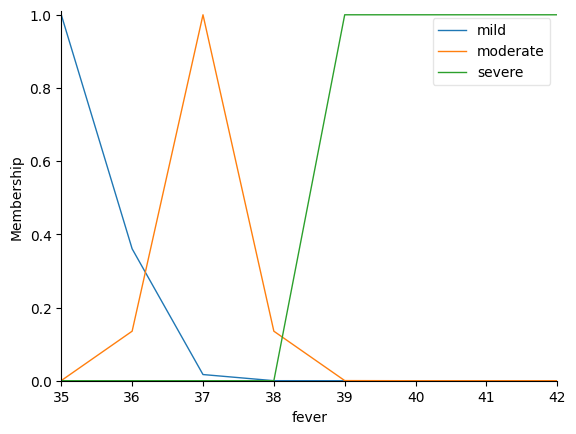

In [3]:
fever.view()

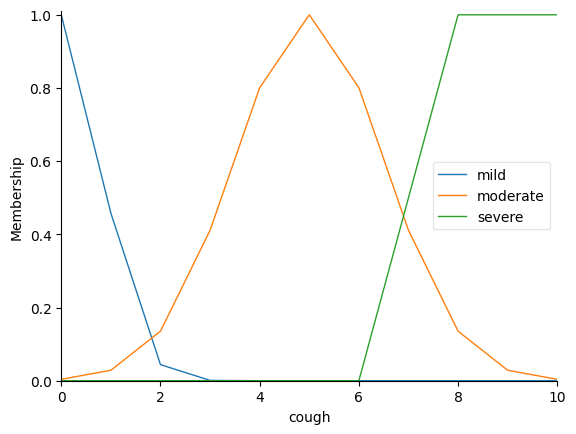

In [4]:
cough.view()

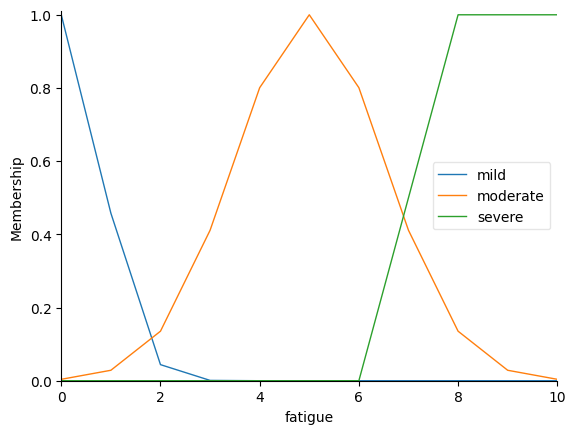

In [6]:
fatigue.view()

### Category 2

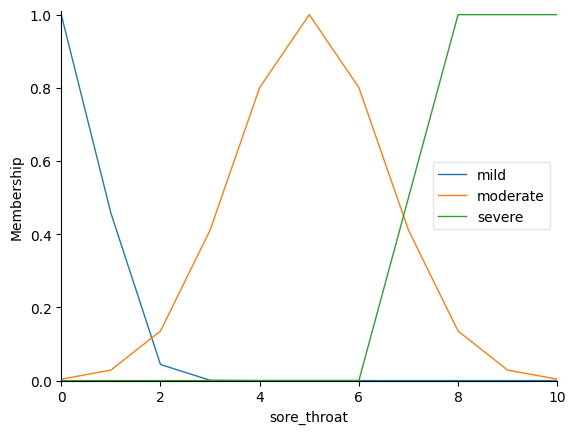

In [5]:
sore_throat.view()

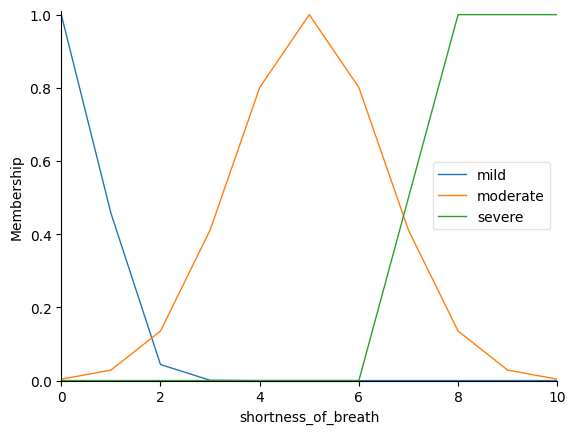

In [7]:
shortness_of_breath.view()

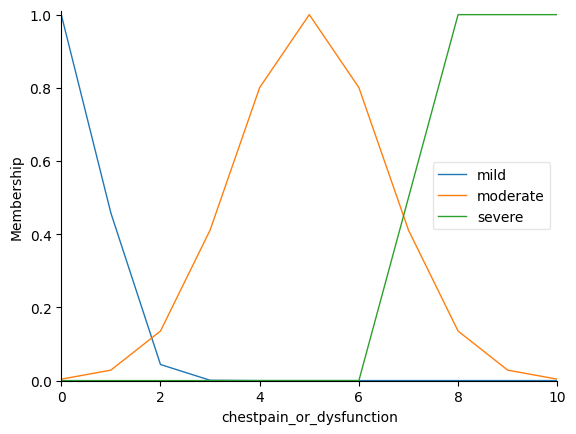

In [8]:
chestpain_or_dysfunction.view()

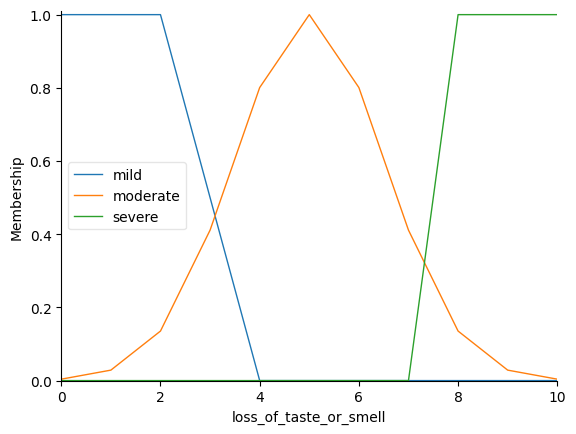

In [9]:
loss_of_taste_or_smell.view()

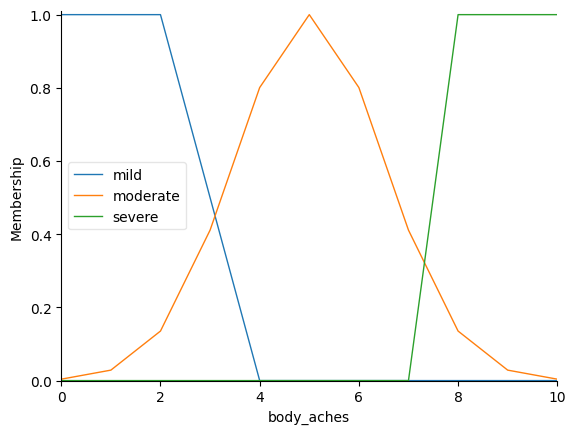

In [10]:
body_aches.view()

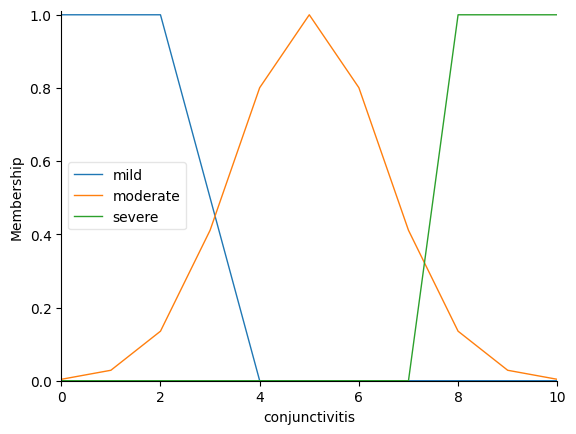

In [11]:
conjunctivitis.view()

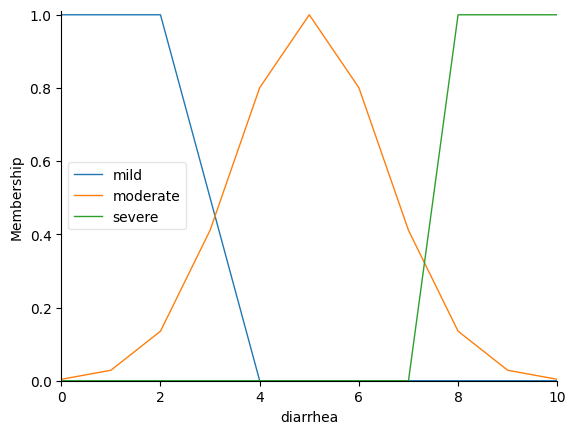

In [12]:
diarrhea.view()

### Category 3

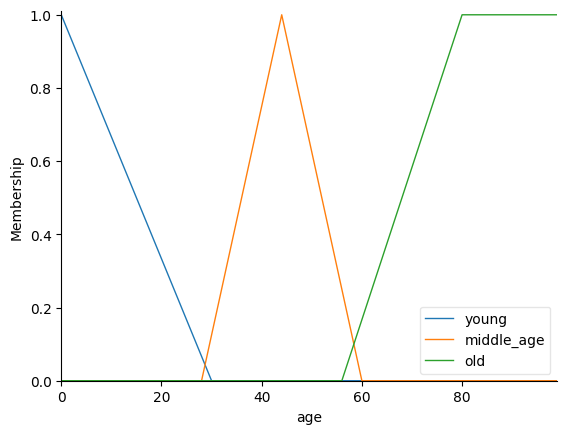

In [13]:
age.view()

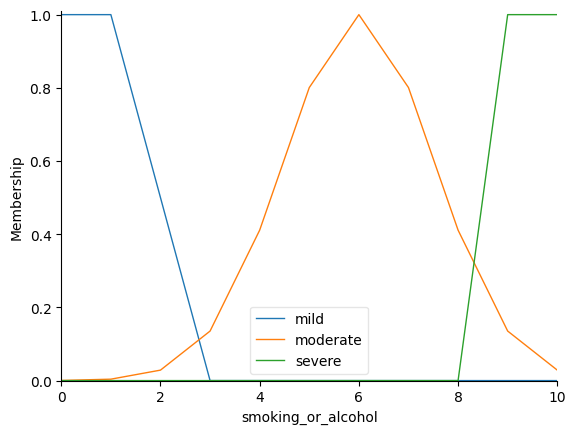

In [14]:
smoking_or_alcohol.view()

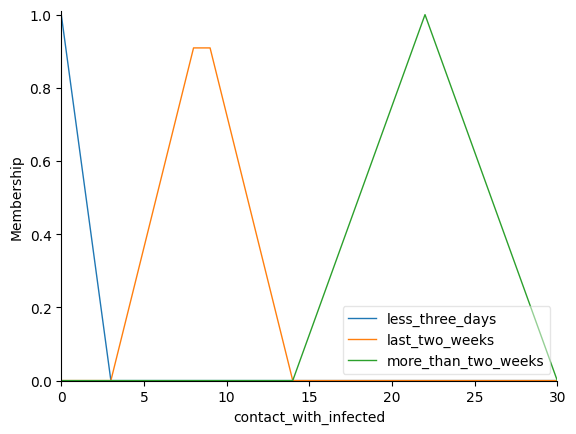

In [15]:
contact_with_infected.view()

### Covid-19 (Consequent)

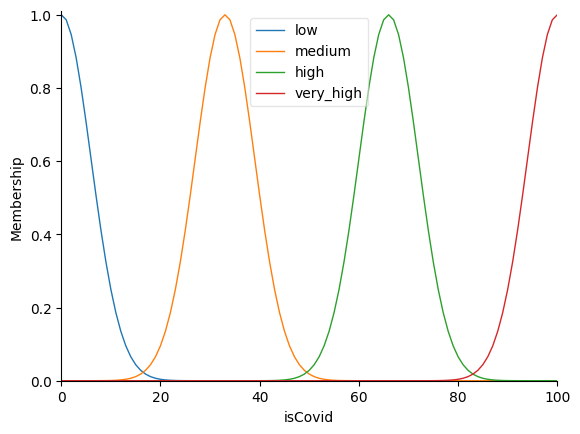

In [3]:
isCovid.view()

## Rules

Based on the information from the provided documents and the use of ChatGPT, we can create a set of 20 fuzzy rules. These rules will be structured to evaluate the likelihood of COVID-19 infection based on various combinations of symptoms and personal information.

### Proposed Fuzzy Rules

1. **High Fever, Severe Cough, and Severe Fatigue**:  
   - If fever is severe AND cough is severe AND fatigue is severe AND shortness of breath and chestpain or dysfunction are severe, THEN isCovid is very high.

2. **Moderate Symptoms in Category 1**:  
   - If fever is moderate AND cough is moderate AND fatigue is moderate, THEN isCovid is high.

3. **~~Severe Symptoms in Category 2~~**: (Removed due to confussions generated in the fuzzy logic system -> poor maximum severity performance)
   - If loss of taste or smells and sore throat are severe, THEN isCovid is medium.

4. **~~Age and Exposure Factors~~**: (Removed due to zero influence in performance)
   - If age is old AND contact_with_infected is more_than_two_weeks, THEN isCovid is medium.

5. **~~Smoking or Alcohol with Symptoms~~**: (Removed due to zero influence in performance)
   - If smoking_or_alcohol is severe AND cough or fatigue are moderate, THEN isCovid is high.

6. **~~Mild Symptoms Across Categories~~**: (Removed due to increase in performance in maximum severity case, no influence in rest of scenarios)
   - If all symptoms in Category 1 are mild AND conjunctivits is mild, THEN isCovid is low.

7. **~~Young Age with Mild Symptoms~~**: (Removed due to zero influence in performance)
   - If age is young AND all symptoms in Category 1 are mild, THEN isCovid is low.

8. **Severe Rare Symptoms and Exposure**:  
   - If shortness of breath, body aches and diarrhea are severe AND contact_with_infected is less_three_days, THEN isCovid is very high.

9. **Moderate Symptoms with Exposure**:  
   - If fever and cough are moderate AND contact_with_infected is more_than_two_weeks, THEN isCovid is medium.

10. **~~Old Age with Moderate Symptoms~~**: (Removed due to zero influence in performance)
    - If age is old AND cough and fatigue are high, THEN isCovid is very high.

11. **~~Combination of Symptoms in Category 1~~**: (Removed due to zero influence in performance)  
    - If fever is severe AND cough is mild AND fatigue is moderate, THEN isCovid is medium.

12. **~~Severe Symptoms with Rare Symptoms~~**: (Removed due to zero influence in performance)  
    - If all symptoms in Category-2 are severe THEN isCovid is very high.

13. **Rare Symptoms with Mild General Symptoms**:  
    - If shortness of breath and chest pain or dysfunction are moderate AND all symptoms in Category 1 are mild, THEN isCovid is medium.

14. **~~Young Age with Severe Symptoms~~**: (Removed due to decrease of performance of system when detecting symptoms of young)
    - If age is young AND any symptom in Category 1 is severe, THEN isCovid is medium.

15. **No Symptoms in Category 1, Mild in Category 2**:  
    - If no symptoms in Category 1 AND sore throat and body aches are mild, THEN isCovid is low.

16. **Moderate Rare Symptoms with Exposure**:  
    - If loss of taste or smell and diarrhea are moderate AND contact_with_infected is less_three_days, THEN isCovid is medium.

17. **Old Age with No Symptoms in Category 1**:  
    - If age is old AND no symptoms in Category 1, THEN isCovid is low.

18. **Severe Symptoms in Both Categories**:  
    - If any symptom in Category 1 is severe AND any symptom in Category 2 is severe, THEN isCovid is very high.

19. **Moderate Symptoms with No Exposure**:  
    - If all symptoms in Category 1 are moderate AND contact_with_infected is less_three_days, THEN isCovid is high.

20. **Mild Symptoms with Recent Exposure**:  
    - If all symptoms in Category 1 are mild AND contact_with_infected is last_two_weeks, THEN isCovid is low.

These resulting 13 rules are designed to cover a range of scenarios combining symptoms from different categories and personal information. They aim to provide a nuanced assessment of COVID-19 risk based on the severity and combination of symptoms. These rules should be reviewed and possibly adjusted with input from medical professionals to ensure accuracy and relevance. However, this will not be possible due to the limited time and resources for this project.

In [1577]:
# Rule 1
rule1 = ctrl.Rule(fever['severe'] & cough['severe'] & fatigue['severe'], isCovid['very_high'])

# Rule 2
rule2 = ctrl.Rule(fever['moderate'] & cough['moderate'] & fatigue['moderate'], isCovid['high'])

# Rule 3
#rule3 = ctrl.Rule(contact_with_infected['more_than_two_weeks'] & age['middle_age'], isCovid['low'])

# Rule 4
#rule4 = ctrl.Rule(age['old'] & contact_with_infected['more_than_two_weeks'], isCovid['medium'])

# Rule 5
#rule5 = ctrl.Rule(smoking_or_alcohol['severe'] & (cough['moderate'] | fatigue['moderate']), isCovid['high'])

# Rule 6
rule6 = ctrl.Rule((conjunctivitis['moderate'] | diarrhea['moderate']) & age['young'], isCovid['low'])

# Rule 7
#rule7 = ctrl.Rule(age['young'] & fever['mild'] & cough['mild'] & fatigue['mild'], isCovid['low'])

# Rule 8
rule8 = ctrl.Rule(age['old'] & smoking_or_alcohol['severe'] & contact_with_infected['less_three_days'], isCovid['very_high'])

# Rule 9
rule9 = ctrl.Rule(fever['moderate'] & (body_aches['moderate'] | sore_throat['moderate']) & age['middle_age'], isCovid['medium'])

# Rule 10
#rule10 = ctrl.Rule(age['old'] & shortness_of_breath['severe'] & chestpain_or_dysfunction['severe'], isCovid['high'])

# Rule 11
rule11 = ctrl.Rule((cough['mild'] | fever['mild']) & (shortness_of_breath['mild'] | chestpain_or_dysfunction['mild']), isCovid['low'])

# Rule 12
#rule12 = ctrl.Rule(sore_throat['severe'] & shortness_of_breath['severe'] & chestpain_or_dysfunction['severe'] & loss_of_taste_or_smell['severe'] & body_aches['severe'] & conjunctivitis['severe'] & diarrhea['severe'], isCovid['very_high'])

# Rule 13
rule13 = ctrl.Rule(shortness_of_breath['moderate'] & chestpain_or_dysfunction['moderate'], isCovid['medium'])

# Rule 14
#rule14 = ctrl.Rule((shortness_of_breath['moderate'] | contact_with_infected['last_two_weeks']), isCovid['high'])

# Rule 15
rule15 = ctrl.Rule(smoking_or_alcohol['moderate'] & body_aches['mild'], isCovid['low'])

# Rule 16
rule16 = ctrl.Rule(loss_of_taste_or_smell['moderate'] & diarrhea['moderate'] & contact_with_infected['less_three_days'], isCovid['medium'])

# Rule 17
rule17 = ctrl.Rule(shortness_of_breath['moderate'] & chestpain_or_dysfunction['moderate'] & age['old'], isCovid['high'])

# Rule 18
rule18 = ctrl.Rule((fever['severe'] | cough['severe'] | fatigue['severe']) & conjunctivitis['severe'] & chestpain_or_dysfunction['severe'], isCovid['very_high'])

# Rule 19
rule19 = ctrl.Rule(fever['severe'] & cough['moderate'] & fatigue['severe'] & contact_with_infected['less_three_days'], isCovid['high'])

# Rule 20
rule20 = ctrl.Rule(fever['mild'] & cough['mild'] & fatigue['mild'] & contact_with_infected['more_than_two_weeks'], isCovid['low'])

## Create Control System

Now that we have our 20 rules defined, we can simply create a control system with the following line of code.

In [1578]:
covid_ctrl = ctrl.ControlSystem([rule1, rule2, rule6, rule8, rule9, rule11, rule13, rule15, rule16, rule17, rule18, rule19, rule20])

In order to simulate this control system, we will create a
``ControlSystemSimulation``.  This object represents our controller
applied to a specific set of cirucmstances.  For diagnosing Covid-19, this might be writing down the symptoms Juan might have when entering our hospital.  We would create another
``ControlSystemSimulation`` when we're trying to apply our ``covid_ctrl`` for Ivan which comes in later because the inputs would be different.

In [1579]:
covid_sim1 = ctrl.ControlSystemSimulation(covid_ctrl)

### All inputs at maximum severity [3]

This tests the system's response when all symptoms are at their highest possible severity, which might indicate a very high likelihood of COVID-19.

In [1580]:
covid_sim1.input['fever'] = 42
covid_sim1.input['cough'] = 10
covid_sim1.input['fatigue'] = 10
covid_sim1.input['sore_throat'] = 10
covid_sim1.input['shortness_of_breath'] = 10
covid_sim1.input['chestpain_or_dysfunction'] = 10
covid_sim1.input['loss_of_taste_or_smell'] = 10
covid_sim1.input['body_aches'] = 10
covid_sim1.input['conjunctivitis'] = 10
covid_sim1.input['diarrhea'] = 10
covid_sim1.input['age'] = 100
covid_sim1.input['smoking_or_alcohol'] = 10
covid_sim1.input['contact_with_infected'] = 0

We observe the expected output: ~93.5% (very_high)

In [1581]:
covid_sim1.compute()
print(f"COVID-19 risk level for scenario: {covid_sim1.output['isCovid']}")

COVID-19 risk level for scenario: 93.52288049069517


### All inputs at minimum severity [3]

This scenario checks the system's response when all symptoms are at their lowest severity, suggesting a low likelihood of COVID-19.

In [1582]:
covid_sim2 = ctrl.ControlSystemSimulation(covid_ctrl)

In [1583]:
covid_sim2.input['fever'] = 35
covid_sim2.input['cough'] = 0
covid_sim2.input['fatigue'] = 0
covid_sim2.input['sore_throat'] = 0
covid_sim2.input['shortness_of_breath'] = 0
covid_sim2.input['chestpain_or_dysfunction'] = 0
covid_sim2.input['loss_of_taste_or_smell'] = 0
covid_sim2.input['body_aches'] = 0
covid_sim2.input['conjunctivitis'] = 0
covid_sim2.input['diarrhea'] = 0
covid_sim2.input['age'] = 0
covid_sim2.input['smoking_or_alcohol'] = 0
covid_sim2.input['contact_with_infected'] = 30

We observe the expected output: ~5.4% (low)

In [1584]:
covid_sim2.compute()
print(f"COVID-19 risk level for scenario: {covid_sim2.output['isCovid']}")

COVID-19 risk level for scenario: 5.456468950147218


### Mixed Extremes

We will mix scenarios where some symptoms are at their maximum and others at their minimum. This can help test the system's ability to handle contrasting information. The pattern we will follow is set a symptom to its maximum and the next two a medium and low fuzzy. The next scenario will repeat this same pattern but shifting the initial symptom by its number of scenario minus 1 (Scenario 2 -> 1 shift, Scenario 3 -> 2 shifts, etc.)

**First Scenario**

In [1585]:
covid_sim3 = ctrl.ControlSystemSimulation(covid_ctrl)

In [1586]:
covid_sim3.input['fever'] = 40
covid_sim3.input['cough'] = 5
covid_sim3.input['fatigue'] = 2
covid_sim3.input['sore_throat'] = 10
covid_sim3.input['shortness_of_breath'] = 6
covid_sim3.input['chestpain_or_dysfunction'] = 3
covid_sim3.input['loss_of_taste_or_smell'] = 10
covid_sim3.input['body_aches'] = 4
covid_sim3.input['conjunctivitis'] = 3
covid_sim3.input['diarrhea'] = 10
covid_sim3.input['age'] = 33
covid_sim3.input['smoking_or_alcohol'] = 1
covid_sim3.input['contact_with_infected'] = 2

In [1587]:
covid_sim3.compute()
print(f"COVID-19 risk level for scenario: {covid_sim3.output['isCovid']}")

COVID-19 risk level for scenario: 33.00000365592356


**Second Scenario**

In [1588]:
covid_sim4 = ctrl.ControlSystemSimulation(covid_ctrl)

In [1589]:
covid_sim4.input['fever'] = 36
covid_sim4.input['cough'] = 10
covid_sim4.input['fatigue'] = 6
covid_sim4.input['sore_throat'] = 1
covid_sim4.input['shortness_of_breath'] = 10
covid_sim4.input['chestpain_or_dysfunction'] = 7
covid_sim4.input['loss_of_taste_or_smell'] = 0
covid_sim4.input['body_aches'] = 10
covid_sim4.input['conjunctivitis'] = 5
covid_sim4.input['diarrhea'] = 2
covid_sim4.input['age'] = 82
covid_sim4.input['smoking_or_alcohol'] = 5
covid_sim4.input['contact_with_infected'] = 0

In [1590]:
covid_sim4.compute()
print(f"COVID-19 risk level for scenario: {covid_sim4.output['isCovid']}")

COVID-19 risk level for scenario: 49.5000318019666


**Third Scenario**

In [1591]:
covid_sim5 = ctrl.ControlSystemSimulation(covid_ctrl)

In [1592]:
covid_sim5.input['fever'] = 38
covid_sim5.input['cough'] = 2
covid_sim5.input['fatigue'] = 10
covid_sim5.input['sore_throat'] = 4
covid_sim5.input['shortness_of_breath'] = 1
covid_sim5.input['chestpain_or_dysfunction'] = 10
covid_sim5.input['loss_of_taste_or_smell'] = 6
covid_sim5.input['body_aches'] = 1
covid_sim5.input['conjunctivitis'] = 10
covid_sim5.input['diarrhea'] = 6
covid_sim5.input['age'] = 13
covid_sim5.input['smoking_or_alcohol'] = 8
covid_sim5.input['contact_with_infected'] = 9

In [1593]:
covid_sim5.compute()
print(f"COVID-19 risk level for scenario: {covid_sim5.output['isCovid']}")

COVID-19 risk level for scenario: 56.11203661126171


From the output obtained from the three scenarios, we can observe that the Category-1 symptoms have great influence over the risk assessment of Covid-19 Diagnosis. Moreover, rare symptoms which increase the chances of having Covid-19 are shortness of breath, chest pain or dysfunction and smoking or consuming alcohol. This analysis matches the information researched in our scientific papers.  

### Age-Specific Scenarios

We will test with the minimum and maximum age values, especially considering how age might interact with other symptoms.

**Young**

In [1594]:
covid_sim6 = ctrl.ControlSystemSimulation(covid_ctrl)

In [1595]:
covid_sim6.input['fever'] = 38
covid_sim6.input['cough'] = 5
covid_sim6.input['fatigue'] = 5
covid_sim6.input['sore_throat'] = 5
covid_sim6.input['shortness_of_breath'] = 5
covid_sim6.input['chestpain_or_dysfunction'] = 5
covid_sim6.input['loss_of_taste_or_smell'] = 5
covid_sim6.input['body_aches'] = 5
covid_sim6.input['conjunctivitis'] = 5
covid_sim6.input['diarrhea'] = 5
covid_sim6.input['age'] = 0
covid_sim6.input['smoking_or_alcohol'] = 5
covid_sim6.input['contact_with_infected'] = 10

In [1596]:
covid_sim6.compute()
print(f"COVID-19 risk level for scenario: {covid_sim6.output['isCovid']}")

COVID-19 risk level for scenario: 29.882566420969


**Medium Age**

In [1597]:
covid_sim7 = ctrl.ControlSystemSimulation(covid_ctrl)

In [1598]:
covid_sim7.input['fever'] = 38
covid_sim7.input['cough'] = 5
covid_sim7.input['fatigue'] = 5
covid_sim7.input['sore_throat'] = 5
covid_sim7.input['shortness_of_breath'] = 5
covid_sim7.input['chestpain_or_dysfunction'] = 5
covid_sim7.input['loss_of_taste_or_smell'] = 5
covid_sim7.input['body_aches'] = 5
covid_sim7.input['conjunctivitis'] = 5
covid_sim7.input['diarrhea'] = 5
covid_sim7.input['age'] = 40
covid_sim7.input['smoking_or_alcohol'] = 5
covid_sim7.input['contact_with_infected'] = 10

In [1599]:
covid_sim7.compute()
print(f"COVID-19 risk level for scenario: {covid_sim7.output['isCovid']}")

COVID-19 risk level for scenario: 39.80493947591308


**Old**

In [1600]:
covid_sim8 = ctrl.ControlSystemSimulation(covid_ctrl)

In [1601]:
covid_sim8.input['fever'] = 38
covid_sim8.input['cough'] = 5
covid_sim8.input['fatigue'] = 5
covid_sim8.input['sore_throat'] = 5
covid_sim8.input['shortness_of_breath'] = 5
covid_sim8.input['chestpain_or_dysfunction'] = 5
covid_sim8.input['loss_of_taste_or_smell'] = 5
covid_sim8.input['body_aches'] = 5
covid_sim8.input['conjunctivitis'] = 5
covid_sim8.input['diarrhea'] = 5
covid_sim8.input['age'] = 80
covid_sim8.input['smoking_or_alcohol'] = 5
covid_sim8.input['contact_with_infected'] = 10

In [1602]:
covid_sim8.compute()
print(f"COVID-19 risk level for scenario: {covid_sim8.output['isCovid']}")

COVID-19 risk level for scenario: 49.50000031331844


From the output obtained from the three different scenarios we have observed that having a younger age favours having less risk of having Covid-19, 10% less in contrast with middle-age people and 20% less in contrast with old people.

## Final Reflection


As a third-year Computer Engineering student, this project on developing a Fuzzy Logic Expert System for COVID-19 diagnosis has been an enlightening and challenging experience. Here's a summary of my journey through this project:

### Summary of Learning

Throughout this project, I gained a deeper understanding of fuzzy logic systems and their application in real-world scenarios, particularly in healthcare. The task of translating medical symptoms and their severities into a fuzzy logic framework highlighted the complexity and nuances of diagnostic processes.

### Addressing Initial Shortcomings

Initially, the project faced several challenges:
- **Complexity of Medical Data**: Understanding and accurately representing medical data in a fuzzy logic system was initially daunting. Through research and iterative development, I improved my ability to handle this complexity.
- **Rule Definition and Calibration**: Crafting and calibrating rules to reflect realistic medical scenarios required several iterations. Some rules initially failed to identify high-risk COVID-19 cases correctly, which was addressed through modifications and extensive testing.

### Acquired New Knowledge and Skills

- **Fuzzy Logic Implementation (Skill Acquisition: Level 3)**: I had no prior experience with fuzzy logic systems. Through this project, I went from having zero knowledge to effectively implementing a complex fuzzy logic system.
- **Python Programming for Data Science (Skill Reinforcement: Level 2)**: While I had basic Python skills, this project allowed me to apply them in a data science context, enhancing my proficiency.
- **System Testing and Debugging (Skill Acquisition: Level 2)**: Developing a testing strategy for a fuzzy logic system was new to me. I learned to create and run simulations, identify issues, and refine the system accordingly.

### Skills Reinforced

- **Problem-Solving and Critical Thinking**: These foundational skills were further honed as I navigated through the complexities of the project.
- **Research and Self-Learning**: Conducting research on fuzzy logic and its applications in healthcare was integral to the project's success.

### Assessment of Individual Work

- **Hours Spent**: Approximately 30 hours were dedicated to this project, spread over several weeks.
- **Job Performance**: I managed to implement a functioning system, though it required continuous refinement.
- **Planning and Implementation**: Initial planning was challenging, but I adapted my strategies as the project progressed. Implementation was methodical, involving iterative development and testing.
- **Collaboration**: Regular consultations with peers and my professor provided valuable insights, especially in refining the fuzzy logic rules and understanding medical data. This collaborative approach was instrumental in overcoming hurdles and enhancing the system's accuracy.

### Conclusion

This project was a significant undertaking that pushed the boundaries of my existing knowledge and skills. It was both challenging and rewarding, providing a practical application of fuzzy logic in a crucial field like healthcare. The skills and knowledge acquired through this project have not only contributed to my academic growth but have also prepared me for tackling complex problems in my future career as a computer engineer.

## References

1. [Şimşek, H., Yangın, E. An alternative approach to determination of Covid-19 personal risk index by using fuzzy logic. Health Technol. 12, 569-582 (2022).](https://link.springer.com/article/10.1007/s12553-021-00624-9)
2. [Teacher's Notes. Rafael del Hoyo Alonso. "Intelligent Systems". Plataforma Docente Universitaria de Universidad San Jorge. 2024](https://pdu.usj.es)
3. [ChatGPT-4. OpenAI](https://chat.openai.com)
4. [How to fuzzify a crisp variable. StackOverflow](https://stackoverflow.com/questions/49990573/how-to-fuzify-a-crispy-variable)
5. [Centers for Desease Control and Prevention. Symptoms of COVID-19 Oct 26. 2022](https://www.cdc.gov/coronavirus/2019-ncov/symptoms-testing/symptoms.html)
6. Shatnawi, Maad; Shatnawi, Anas; AlShara, Zakarea; and Husari, Ghaith. 2021. Symptoms-Based Fuzzy-
Logic Approach for COVID-19 Diagnosis. International Journal of Advanced Computer Science and
Applications. Vol.12(4). 444-452. https://doi.org/10.14569/IJACSA.2021.0120457 ISSN: 2158-107X
7. [Informe COVID-19. 30 de junio de 2023. Instituto de Salud Carlos III.](https://www.isciii.es/QueHacemos/Servicios/VigilanciaSaludPublicaRENAVE/EnfermedadesTransmisibles/Documents/INFORMES/Informes%20COVID-19/INFORMES%20COVID-19%202023/Informe%20n%C2%BA%20181%20Situaci%C3%B3n%20actual%20de%20COVID-19%20en%20Espa%C3%B1a%20a%2030%20de%20junio%20de%202023.pdf)
8. [Alhammadi, Fatema, Fatima Alkhanbashi, and Maad Shatnawi. "COVID-19 Fuzzy Inference System." 2020 International Conference on Computational Science and Computational Intelligence (CSCI). IEEE, 2020.](https://ieeexplore.ieee.org/abstract/document/9458124)

